# Задание A1
### Тестовые данные представлены в /data/tests/
### Результаты тестов лежат в /data/
### В рамках данного задания было реализовано:

* ### StringGenerator - класс, генерирующий вектора строк 

    * #### Объявление методов лежит в ```StringGenerator.h```, присутствуют 4 метода - создание вектора строк в случайном порядке, создание отсортированного вектора строк, почти отсортированного и отсортированного в обратном порядке. Каждый метод принимает seed для генерации. Сама генерация происходит при помощи ```std::uniform_int_distribution```. Реализации находятся в ```StringGenerator.cpp```, все представленные ограничения на генерацию строк соблюдаются.
  
* ### Сортировки:

  * #### Для упрощения и автоматизации тестирования был создан класс Sorter. Он содержит в себе компараторы, переменную для подсчета количества сравнений, указатель на функцию сортировки, структуру лога сортировки и несколько функций для установки компараторов и сортировок. Лог сортировок представляет собой структуру: {время, количество сравнения, результат проверки на отсортированность}. Объявления лежат в ```Sorter.h```, реализации - в ```Sorter.cpp```
    
  * #### Все объявления сортировок находятся в файле ```sort.h```, при этом в sort.cpp находятся функции, реализующие тестирование и записи в файл. Так же каждая функция использует кастомные компараторы, которые лежат в переменных, объявленных в ```sort.h``` ```{s_comp, c_comp, lcp_comp}```
  * ####  MERGESORT - реализация находится в ```merge_sort.cpp```, представляет собой базовый merge sort, в котором применяется стандартное сравнение строк
  * #### QUICKSORT - реализация находится в ```q_sort.cpp```, представляет собой базовый quick_sort, в котором применяется стандартное сравнение строк. В обеих реализациях в качестве pivot выбирается последний элемент массива
  * #### STRING QUICKSORT - реализация находится в ```q_sort_string.cpp```, представляет собой улучшенный quick_sort, сортирующий по конкретному символу на каждое итерации
  * #### STRING MERGESORT - реализация находится в ```merge_sort_string.cpp```, представляет собой улучшенный merge_sort, в котором применяются lcp сравнения
  * #### MSD RADIX SORT без STRING QUICKSORT - реализация находится в ```radix_sort.cpp```, представлен функциями: ```radix_sort_string```, ```basic_msd_radix_sort_string```, ```counting_sort```. В обоих алгоритмах класса radix sort используется одна и та же сортировка подсчетом. При этом RADIX SORT с переключением вынесен в отдельный алгоритм, чтобы уменьшить влияние проверки условия переключения на базовый алгоритм
  * #### MSD RADIX SORT с STRING QUICKSORT - реализация находится в ```radix_sort.cpp```, представлен функциями: ```radix_sort_switched```, ```switched_msd_radix_sort_string```, ```counting_sort```


In [36]:
from itertools import chain
import matplotlib.pyplot as plt

Вспомогательный класс

In [28]:
class SortLog:
    def __init_(self, time, comparisons, is_sorted):
        self.time = time
        self.comparisons = comparisons
        self.is_sorted = is_sorted


def check_all_sorted(logs: list[SortLog]) -> bool:
    return all(i.is_sorted for i in logs)


def parse(s: str) -> SortLog:
    log = SortLog()
    s = s[1:-2]
    s = s.split(',')
    log.time = int(s[0].split()[1][:-2])
    log.comparisons = int(s[1].strip().split()[1])
    log.is_sorted = (s[2].strip().split()[1] == 'true')
    return log


def get_logs(path: str) -> list[SortLog]:
    logs = []
    with open(path, 'r') as file:
        for i in file.readlines():
            logs.append(parse(i))
    return logs

Собираем данные...

In [26]:
q_sort = [
    get_logs("../data/q_sort_random.txt"),
    get_logs("../data/q_sort_backward.txt"),
    get_logs("../data/q_sort_almost_sorted.txt")
]
merge_sort = [
    get_logs("../data/merge_sort_random.txt"),
    get_logs("../data/merge_sort_backward.txt"),
    get_logs("../data/merge_sort_almost_sorted.txt")
]

q_sort_string = [
    get_logs("../data/q_sort_string_random.txt"),
    get_logs("../data/q_sort_string_backward.txt"),
    get_logs("../data/q_sort_string_almost_sorted.txt")
]
merge_sort_string = [
    get_logs("../data/merge_sort_string_random.txt"),
    get_logs("../data/merge_sort_string_backward.txt"),
    get_logs("../data/merge_sort_string_almost_sorted.txt")
]
msd_basic = [
    get_logs("../data/msd_radix_sort_random.txt"),
    get_logs("../data/msd_radix_sort_backward.txt"),
    get_logs("../data/msd_radix_sort_almost_sorted.txt"),
]
msd_switched = [
    get_logs("../data/msd_radix_sort_switched_random.txt"),
    get_logs("../data/msd_radix_sort_switched_backward.txt"),
    get_logs("../data/msd_radix_sort_switched_almost_sorted.txt"),
]

Проверим данные:

In [32]:
check_all_sorted(list(
    chain.from_iterable(
        chain.from_iterable([q_sort, merge_sort, q_sort_string, merge_sort_string, msd_basic, msd_switched]))))

True

Данные действительно были отсортированы
Построим графики для каждого отдельного случая

In [58]:
def get_comparisons(i: SortLog):
    return i.comparisons


def get_time(i: SortLog):
    return i.time


def plott(axis, y, what, color, label):
    axis.scatter(list(i for i in range(100, 3000 + 1, 100)), list(what(i) for i in y), color=color, label=label)


def name_of(what):
    if what == get_time:
        return "время в микросекундах"
    else:
        return "количество сравнений"


def plot(array, name, what):
    fig, ax = plt.subplots()
    plott(ax, array[0], what, "red", f"{name} random")
    plott(ax, array[1], what, "yellow", f"{name} backward")
    plott(ax, array[2], what, "blue", f"{name} almost sorted")
    ax.legend()
    plt.title(f"{name} {name_of(what)}")
    plt.show()

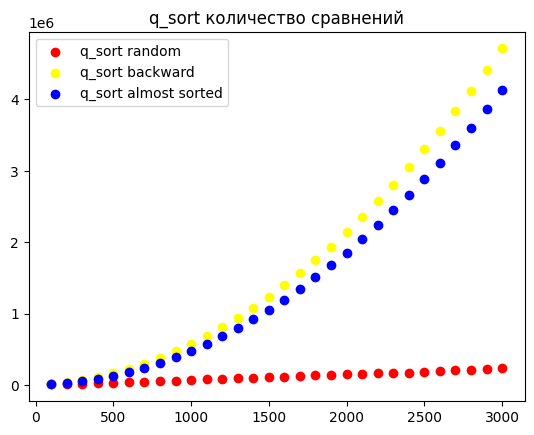

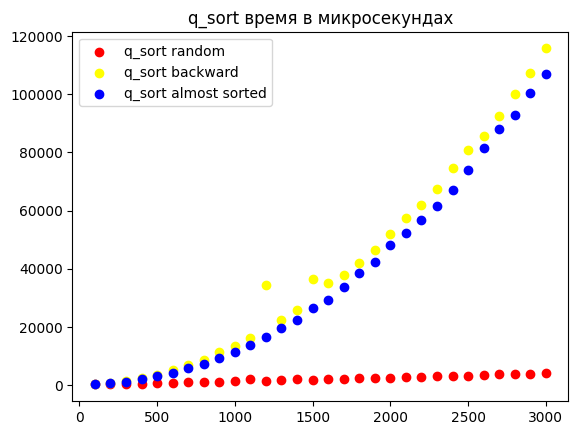

In [60]:
plot(q_sort, "q_sort", get_comparisons)
plot(q_sort, "q_sort", get_time)

Как мы можем заметить, количество сравнений и время сильно лучше на равномерно распределенных данных, нежели чем на отсортированных или почти отсортированных данных (не зависимо от порядка сортировки). Это связано с реализацией q_sort - в данной работе за pivot берется последний элемент, что на отсортированных данных приводит к сложности $O(n^2)$

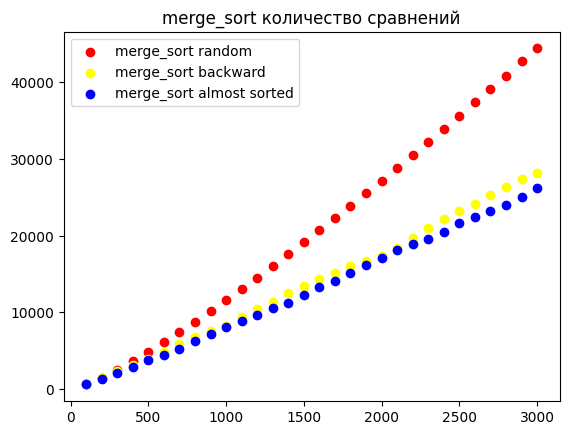

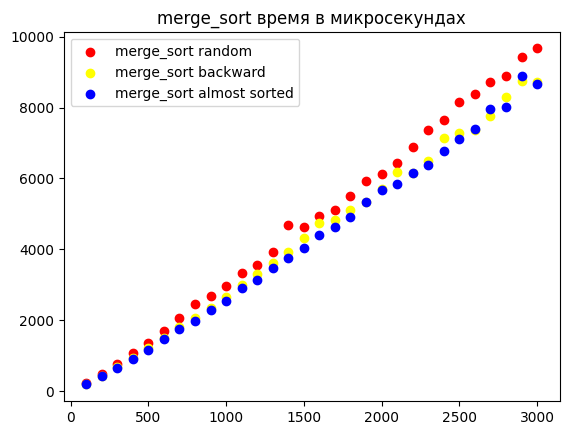

In [61]:
plot(merge_sort, "merge_sort", get_comparisons)
plot(merge_sort, "merge_sort", get_time)

С точки зрения количества сравнений - стандартный merge sort показал себя лучше базового quick sort. Однако из-за накладных затрат связанных с разделением/созданием/слиянием контейнеров и копированием строк, merge sort в абсолютном выражении времени показывает себя в среднем хуже, чем quick sort. При этом рост времени сортировки не сильно зависит от набора данных - merge sort не так чувствителен к "худшим случаям".


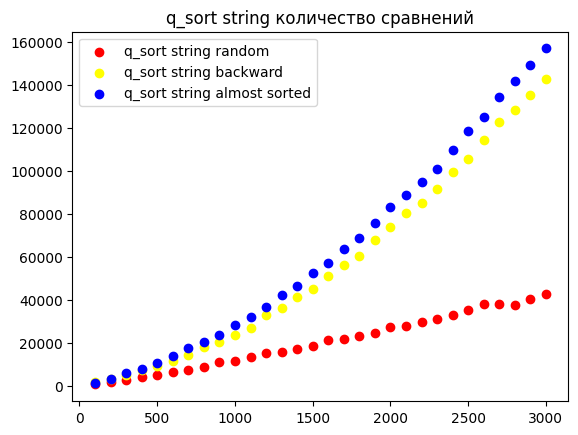

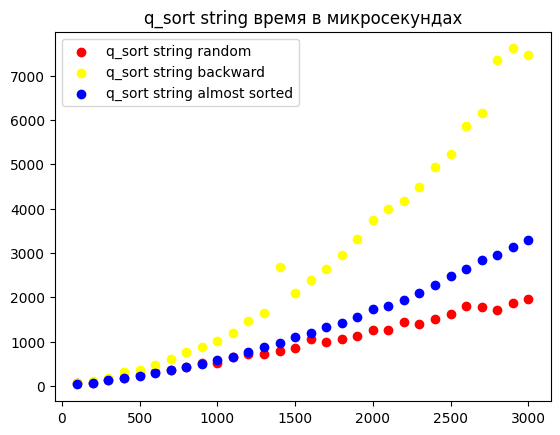

In [62]:
plot(q_sort_string, "q_sort string", get_comparisons)
plot(q_sort_string, "q_sort string", get_time)

Обычный qsort имел 4'714'009 сравнений в худшем случае (массив backwards, 3000 элементов). Улучшенный quick sort показывает в худшей конфигурации на тех же данных не более 160'000. За счет добавления уровней сортировки в виде динамического посимвольного сравнения, количество сравнений символов сильно уменьшилось, что привело к падению времени. Большое отклонение во времени работы алгоритма на обратно отсортированном массиве так же связано со способом поиска pivot'а, однако ситуация исправилась для почти отсортированного массива.

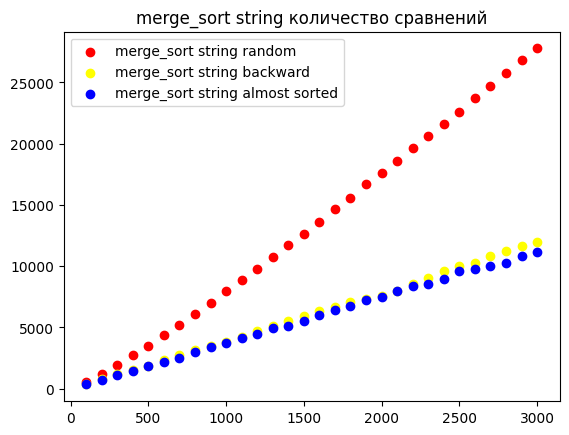

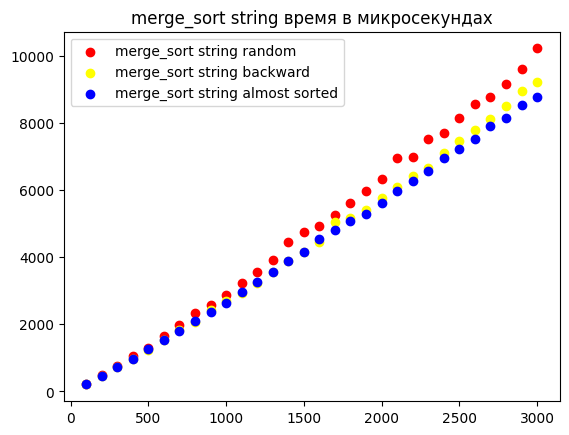

In [63]:
plot(merge_sort_string, "merge_sort string", get_comparisons)
plot(merge_sort_string, "merge_sort string", get_time)

merge_sort string так же уменьшает количество сравнений базового алгоритма, особенно это заметно на упорядоченных данных - lcp сравнения в такой конфигурации пересчитываются относительно реже, чем при равномерно распределенных данных. Среднее время работы алгоритма все еще мало зависит от упорядоченности входного набора

Сравним qsort и merge_sort с их улучшениями:

In [66]:
def compare(arr1, name1, arr2, name2, what):
    fig, ax = plt.subplots()
    plott(ax, arr1[0], what, "red", f"{name1} random")
    plott(ax, arr1[1], what, "yellow", f"{name1} backward")
    plott(ax, arr1[2], what, "blue", f"{name1} almost sorted")
    plott(ax, arr2[0], what, "brown", f"{name2} random")
    plott(ax, arr2[1], what, "green", f"{name2} backward")
    plott(ax, arr2[2], what, "orange", f"{name2} almost sorted")
    ax.legend()
    plt.title(f"{name1} vs {name2}: {name_of(what)}")
    plt.show()

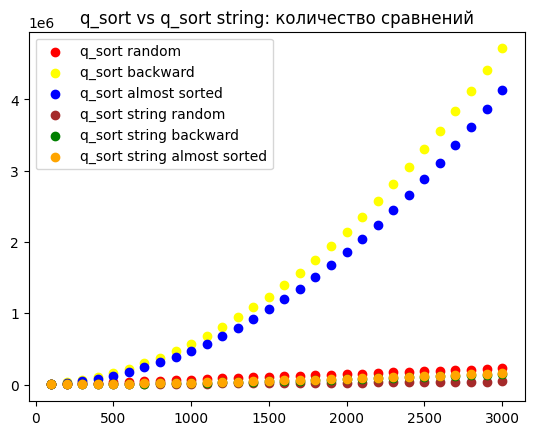

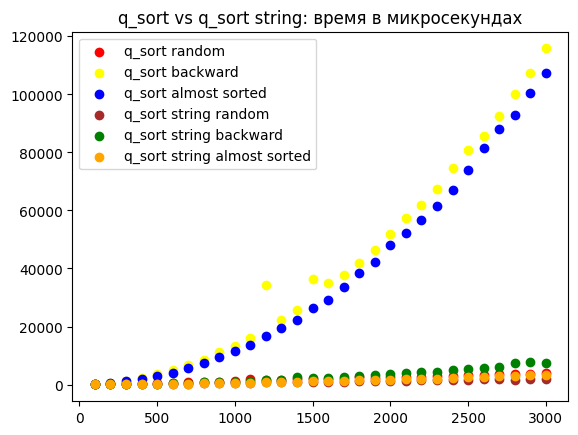

In [68]:
compare(q_sort, "q_sort", q_sort_string, "q_sort string", get_comparisons)
compare(q_sort, "q_sort", q_sort_string, "q_sort string", get_time)

С точки зрения сравнений - даже в худшем случае улучшенный алгоритм дает в среднем (не сильно) меньше или столько же сравнений, сколько дает обычный алгоритм в стандартном случае. Улучшение алгоритма так же хорошо себя показывает с точки зрения времени - худший случай уже не выделяется так сильно

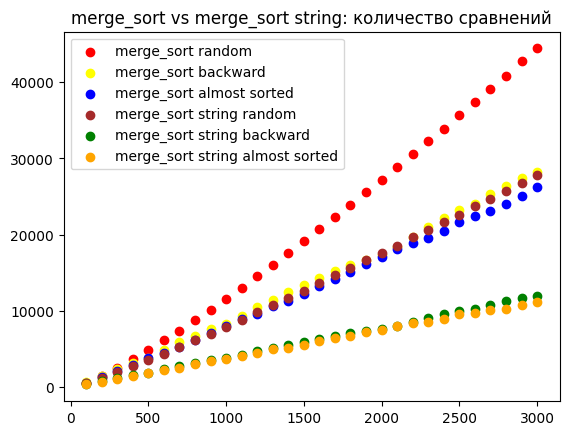

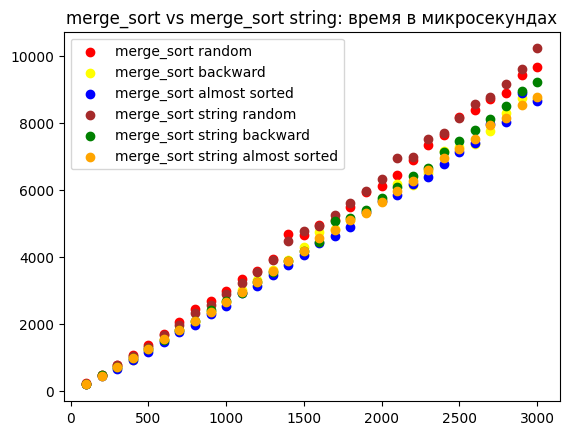

In [69]:
compare(merge_sort, "merge_sort", merge_sort_string, "merge_sort string", get_comparisons)
compare(merge_sort, "merge_sort", merge_sort_string, "merge_sort string", get_time)

Как мы можем заметить, улучшение алгоритма в целом снижает количество сравнений символов, однако это не сильно сказывается на времени работы алгоритма. Это связано с небольшими размерами тестовых данных - при сортировке бОльших наборов строк снижение количества сравнений символову будет приводить к снижению времени и разница результатов будет более ощутимой.

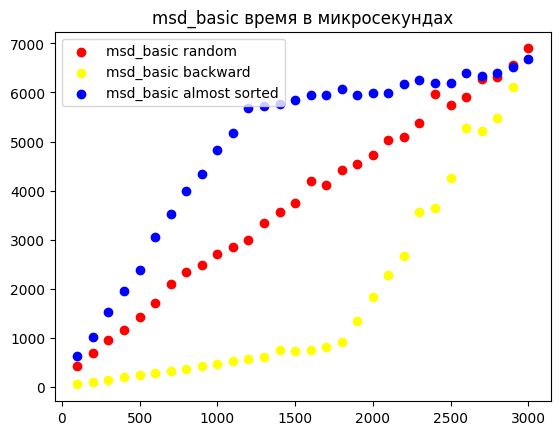

In [71]:
#plot(msd_basic, "msd_basic", get_comparisons) - Сортировка построена на отсутствии сравнений
plot(msd_basic, "msd_basic", get_time)

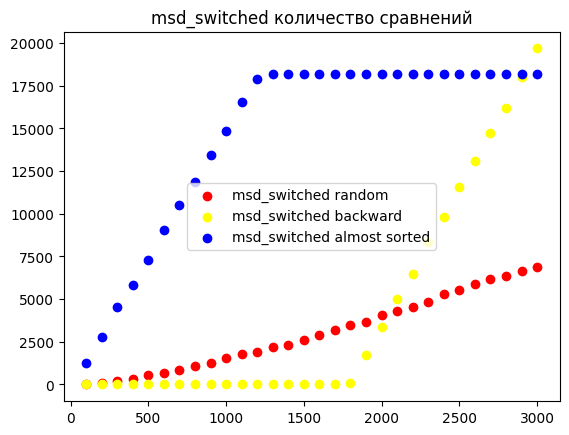

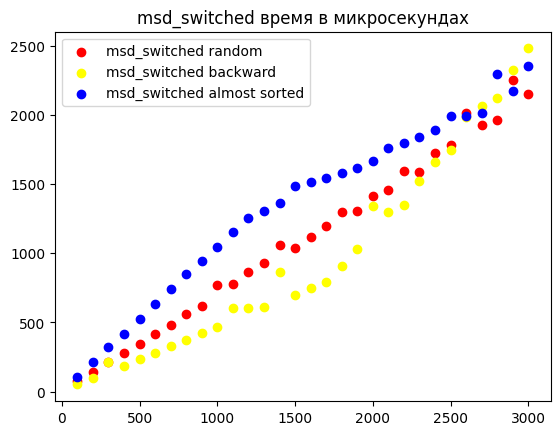

In [72]:
plot(msd_switched, "msd_switched", get_comparisons)
plot(msd_switched, "msd_switched", get_time)

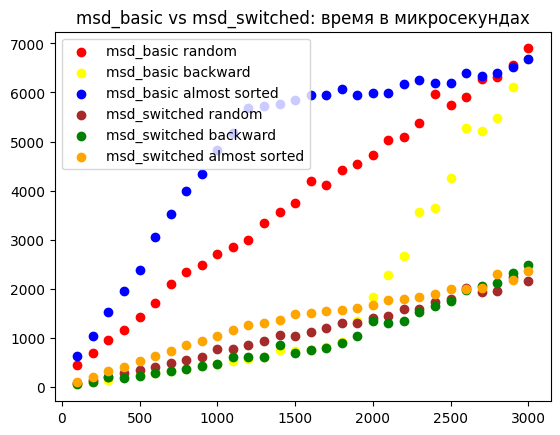

In [74]:
#compare(msd_basic, "msd_basic", msd_switched, "msd_switched", get_comparisons)
compare(msd_basic, "msd_basic", msd_switched, "msd_switched", get_time)

Как мы можем заметить, базовая сортировка подсчетом показывает достаточно неравномерный рост. Скорее всего на это влияет структура строк, которые должны быть отсортированы - длины кластеров из строк, совпадающих по конкретному символу и тд. При этом базовая сортировка не требует сравнений (поэтому она не показана). Так же достаточно большой разброс имеет количество сравнений в улучшенном алгоритме - скорее всего это так же связано с размерами образованных в процессе работы кластеров, однако среднее время приближается к линейному, уменьшается разброс. Так же оно уменьшается в абсолютных значениях. Это происходит потому что сортировка подсчетом плохо работает на маленьких наборах строк, в силу больших накладных расходов.

In [147]:
def plot_all(all_el, el_colors, el_labels, what):
    figure, ax = plt.subplots()
    for i in range(len(all_el)):
        for j in range(len(all_el[i])):
            plott(ax, all_el[i][j], what, el_colors[i], (el_labels[i] if j == 0 else ""))
    ax.legend()
    plt.plot()

In [149]:
data = [
    q_sort,
    q_sort_string,
    merge_sort,
    merge_sort_string,
    msd_basic,
    msd_switched
]
colors = [
    "red",
    "blue",
    "yellow",
    "green",
    "black",
    "purple"
]
labels = [
    "q_sort",
    "q_sort_string",
    "merge_sort",
    "merge_sort_string",
    "msd_basic",
    "msd_switched"
]


Количество сравнений:

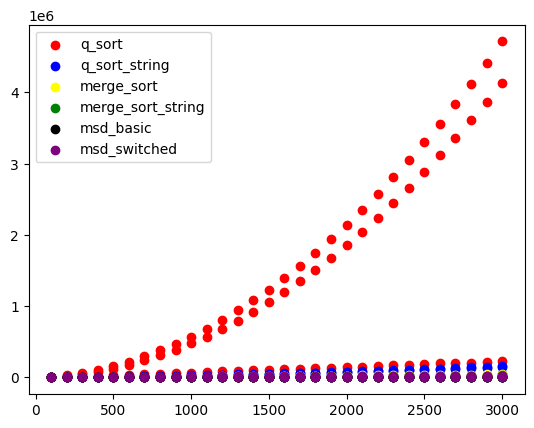

In [150]:
plot_all(data, colors, labels, get_comparisons)

Заметим, что график неинформативен из-за qsort'a, уберем его и сравним еще раз:

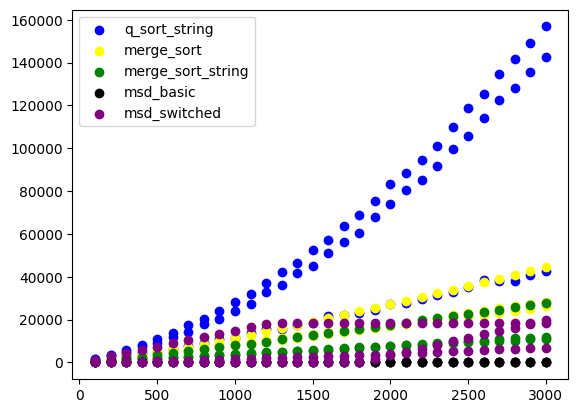

In [151]:
data1 = data.copy()
data1.pop(0)
colors1 = colors.copy()
colors1.pop(0)
labels1 = labels.copy()
labels1.pop(0)
plot_all(data1, colors1, labels1, get_comparisons)

Количество затраченного времени в микросекундах:

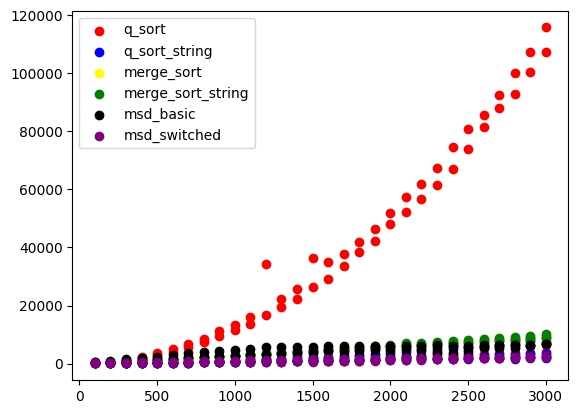

In [152]:
plot_all(data, colors, labels, get_time)

Аналогичная ситуация, уберем qsort:

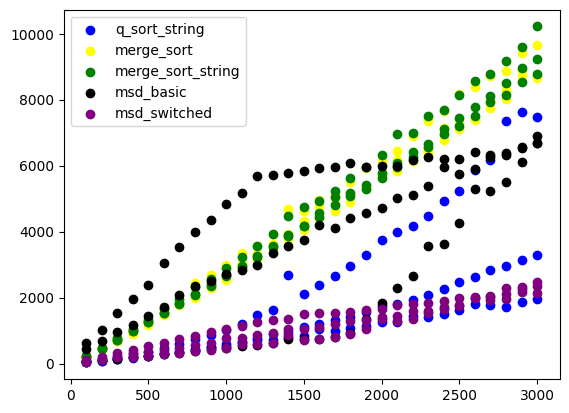

In [153]:
plot_all(data1, colors1, labels1, get_time)

С точки зрения сравнений (не включая базовую сортировку подсчетом) - лучший результат показывает сортировка подсчетом с переключением на улучшенный qsort. Это достаточно предсказуемо - большую часть сортировки алгоритм проделывает без сравнений, переключаясь на сортировку, которая делает относительно не большое количество сравнений на малых данных. Достаточно хорошо себя показывают merge_sort и улучшенный merge_sort. Улучшенная версия показывает меньше сравнений, однако базовая версия так же имеет хороший результат в силу того, что merge_sort сравнивает строки между собой не так часто, как, например, qsort. 
С точки зрения времени работы: худший результат в среднем показывает обычный q_sort - на полученных данных он сильно отстает от любого другого способа сортировки. При этом лучше всех себя показывает сортировка подсчетом с переключением на улучшенный qsort. Также оба merge sort'а показывают в среднем одинаковый по времени результат (из-за и так маленького количества сравнений, уменьшение этих самых сравнений не сильно влияет на скорость работы программы - для полного сравнения этих алгоритмов нужно больше данных), qsort string показывает большой разброс во времени - это связано с выбором pivot'а. Самый плохой результат с точки зрения стабильности показывает обычная сортировка подсчетом.

Отдельно хочется выделить устойчивость merge_sort обоих типов - достаточно стабильный рост с точки зрения времени и сравнений, так же стабильно себя показывает сортировка подсчетом с переключением на qsort string - благодаря особенностям базовой сортировки подсчетом (хорошо сортируются большие наборы строк) и особенностям qsort'а (небольшие накладные расходы => на малых данных даже худший случай не будет проблемой) данный алгоритм показывает лучший результат на любых данных, имея при этом достаточно стабильный небольшой рост.